In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
link1 = 'https://raw.githubusercontent.com/dataminerdbm/test_data_scientist/main/teste.csv'

teste = pd.read_csv(link1)

link2 = 'https://raw.githubusercontent.com/dataminerdbm/test_data_scientist/main/treino.csv'

treino = pd.read_csv(link2)

In [5]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

In [6]:
treino.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,8.823700e+04,110000.000000,110000.000000,110000.000000,110000.000000,107122.000000
mean,0.066645,5.929979,52.255636,0.424055,354.823589,6.637411e+03,8.445573,0.269955,1.019891,0.243891,0.757482
std,0.249408,252.301965,14.768241,4.240780,2074.140421,1.338395e+04,5.139026,4.217326,1.135989,4.204137,1.114670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030054,41.000000,0.000000,0.175016,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155936,52.000000,0.000000,0.366682,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.562806,63.000000,0.000000,0.866874,8.225000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Retirando as duplicatas

In [7]:
treino = treino[ treino.duplicated() == False ]

Retirando todos os NaNs

In [8]:
treino.dropna(inplace=True)

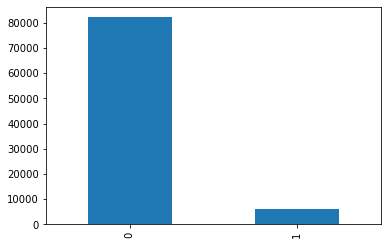

In [9]:
treino.inadimplente.value_counts().plot(kind='bar');

**As Classes estão desbalanceadas !**

In [10]:
treino.inadimplente.value_counts()[0] / treino.inadimplente.value_counts()[1]

13.498026964814207

In [11]:
treino2 = treino[ treino.inadimplente == 1 ]

treino3 = treino[ treino.inadimplente == 1 ]

treino4 = treino[ treino.inadimplente == 1 ]

treino5 = treino[ treino.inadimplente == 1 ]

treino6 = treino[ treino.inadimplente == 1 ]

treino7 = treino[ treino.inadimplente == 1 ]

treino8 = treino[ treino.inadimplente == 1 ]

treino9 = treino[ treino.inadimplente == 1 ]

treino10 = treino[ treino.inadimplente == 1 ]

treino11 = treino[ treino.inadimplente == 1 ]

treino12 = treino[ treino.inadimplente == 1 ]

treino13 = treino[ treino.inadimplente == 1 ]

In [12]:
treino = pd.concat([treino,treino2,treino3,treino4,treino5,treino6,treino7,treino8,treino9,treino10,treino11,treino12,treino13])

In [13]:
treino.inadimplente.value_counts()

0    82095
1    79066
Name: inadimplente, dtype: int64

**Agora as classes estão bem balanceadas**

In [14]:
y = treino.iloc[:,0].copy()

X = treino.iloc[:,1:].copy()

**Selecionando apenas as features importantes usando PCA**

In [15]:
pca = PCA(n_components=6)

pca.fit(X)

X = pca.transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

**Otimizando os hyperparametros**

In [17]:
param_grid = { 
    'n_estimators': [100, 120],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [3,4,5,6],
    'criterion' :['gini', 'entropy']}

In [18]:
rfc=RandomForestClassifier(random_state=42)

In [19]:
mod = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

mod.fit(X_train, y_train)

pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.445467,0.648239,0.269271,0.046668,gini,3,auto,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.696522,0.698410,0.703702,0.699544,0.003039,25
1,7.268417,0.518690,0.457300,0.078953,gini,3,auto,120,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.696495,0.698170,0.703250,0.699305,0.002872,27
2,6.154401,0.331392,0.306514,0.049178,gini,3,sqrt,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.696522,0.698410,0.703702,0.699544,0.003039,25
3,9.298180,0.497533,0.486262,0.094282,gini,3,sqrt,120,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.696495,0.698170,0.703250,0.699305,0.002872,27
4,8.072020,1.281609,0.343415,0.035829,gini,4,auto,100,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.714711,0.718966,0.718381,0.717353,0.001883,17
5,8.455855,0.082293,0.424644,0.129242,gini,4,auto,120,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.714153,0.718620,0.718487,0.717087,0.002075,19
6,6.697309,0.091323,0.327374,0.030512,gini,4,sqrt,100,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.714711,0.718966,0.718381,0.717353,0.001883,17
7,8.587472,0.307046,0.374999,0.035825,gini,4,sqrt,120,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.714153,0.718620,0.718487,0.717087,0.002075,19
8,9.899937,1.934082,0.454281,0.090156,gini,5,auto,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.723700,0.725561,0.724817,0.724692,0.000765,9
9,15.002785,3.062390,0.487216,0.074531,gini,5,auto,120,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.723248,0.725535,0.723700,0.724161,0.000989,11


**Métricas de validação da classificação**

In [20]:
y_pred = mod.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.7338517859728226

In [22]:
recall_score(y_test, y_pred)

0.6838954468802698

In [23]:
precision_score(y_test, y_pred)

0.75129677658392

In [24]:
f1_score(y_test, y_pred)

0.716013418079096

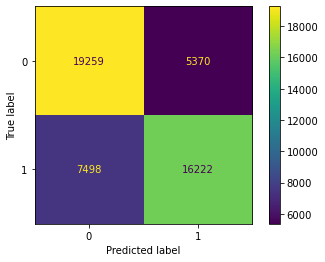

In [25]:
confusion_matrix(y_test, y_pred)

plot_confusion_matrix(mod, X_test, y_test)  

plt.show()  

### 2a Pipeline de Machine Learning

**Objetivos:**
Remoção de outliers

In [4]:
link1 = 'https://raw.githubusercontent.com/dataminerdbm/test_data_scientist/main/teste.csv'

teste = pd.read_csv(link1)

link2 = 'https://raw.githubusercontent.com/dataminerdbm/test_data_scientist/main/treino.csv'

treino = pd.read_csv(link2)

In [5]:
treino = treino[ treino.duplicated() == False ]

In [6]:
treino.dropna(inplace=True)

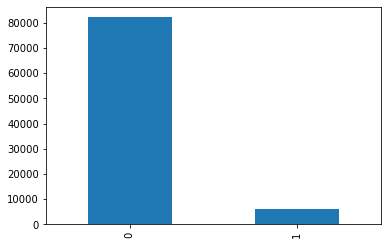

In [7]:
treino.inadimplente.value_counts().plot(kind='bar');

In [8]:
treino.inadimplente.value_counts()[0] / treino.inadimplente.value_counts()[1]

13.498026964814207

In [9]:
treino2 = treino[ treino.inadimplente == 1 ]

treino3 = treino[ treino.inadimplente == 1 ]

treino4 = treino[ treino.inadimplente == 1 ]

treino5 = treino[ treino.inadimplente == 1 ]

treino6 = treino[ treino.inadimplente == 1 ]

treino7 = treino[ treino.inadimplente == 1 ]

treino8 = treino[ treino.inadimplente == 1 ]

treino9 = treino[ treino.inadimplente == 1 ]

treino10 = treino[ treino.inadimplente == 1 ]

treino11 = treino[ treino.inadimplente == 1 ]

treino12 = treino[ treino.inadimplente == 1 ]

treino13 = treino[ treino.inadimplente == 1 ]

In [10]:
treino = pd.concat([treino,treino2,treino3,treino4,treino5,treino6,treino7,treino8,treino9,treino10,treino11,treino12,treino13])

In [11]:
treino.inadimplente.value_counts()

0    82095
1    79066
Name: inadimplente, dtype: int64

In [12]:
def outliers(df=treino,feature=1,n=0.995,):
    
    quant = df[ df.columns[feature] ]
    
    mask = quant < quant.quantile(n)

    df = df[ mask ]

    return df

In [13]:
treino2 = outliers()

In [14]:
for i in range(2,11):
    treino2 = outliers(df=treino2,feature=i)

In [15]:
y = treino2.iloc[:,0].copy()

X = treino2.iloc[:,1:].copy()

In [16]:
pca = PCA(n_components=6)

pca.fit(X)

X = pca.transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [18]:
param_grid = { 
    'n_estimators': [100, 120],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [3,4,5,6],
    'criterion' :['gini', 'entropy']}

In [19]:
rfc=RandomForestClassifier(random_state=42)

In [20]:
mod = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

mod.fit(X_train, y_train)

pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.026735,0.074308,0.224390,0.006502,gini,3,auto,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.701144,0.698590,0.696376,0.698703,0.001948,25
1,5.742752,0.084921,0.266379,0.006537,gini,3,auto,120,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.701058,0.698788,0.695894,0.698580,0.002114,27
2,5.655704,1.088322,0.257632,0.023602,gini,3,sqrt,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.701144,0.698590,0.696376,0.698703,0.001948,25
3,7.464184,1.315910,0.317215,0.043092,gini,3,sqrt,120,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.701058,0.698788,0.695894,0.698580,0.002114,27
4,6.658168,0.429320,0.286137,0.024210,gini,4,auto,100,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.706876,0.709344,0.701881,0.706034,0.003104,21
5,8.007022,0.312404,0.419195,0.099593,gini,4,auto,120,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.705939,0.709600,0.702534,0.706024,0.002885,23
6,6.611681,0.776407,0.250332,0.006148,gini,4,sqrt,100,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.706876,0.709344,0.701881,0.706034,0.003104,21
7,7.061283,0.252072,0.344733,0.065910,gini,4,sqrt,120,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.705939,0.709600,0.702534,0.706024,0.002885,23
8,7.409567,0.362748,0.291552,0.022336,gini,5,auto,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.719191,0.717318,0.714707,0.717072,0.001839,9
9,7.914583,0.266392,0.326129,0.001629,gini,5,auto,120,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.718396,0.716580,0.714764,0.716580,0.001483,15


In [21]:
y_pred = mod.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.7284926064886339

In [23]:
recall_score(y_test, y_pred)

0.5931921191379151

In [24]:
precision_score(y_test, y_pred)

0.7853294146460935

In [25]:
f1_score(y_test, y_pred)

0.6758707909574748

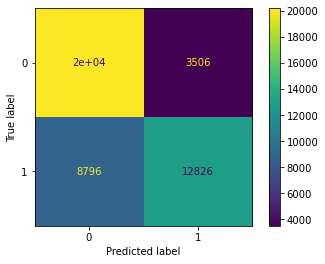

In [26]:
confusion_matrix(y_test, y_pred)

plot_confusion_matrix(mod, X_test, y_test)  

plt.show()  

### 3a Pipeline de Machine Learning

**Objetivos:**
Aproveitamento de NaNs

In [198]:
link1 = 'https://raw.githubusercontent.com/dataminerdbm/test_data_scientist/main/teste.csv'

teste = pd.read_csv(link1)

link2 = 'https://raw.githubusercontent.com/dataminerdbm/test_data_scientist/main/treino.csv'

treino = pd.read_csv(link2)

In [199]:
treino = treino[ treino.duplicated() == False ]

In [200]:
# treino.dropna(inplace=True)

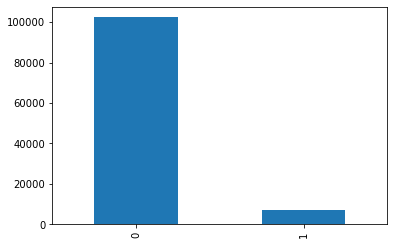

In [201]:
treino.inadimplente.value_counts().plot(kind='bar');

In [202]:
treino.inadimplente.value_counts()[0] / treino.inadimplente.value_counts()[1]

13.981825635419513

In [203]:
treino2 = treino[ treino.inadimplente == 1 ]

treino3 = treino[ treino.inadimplente == 1 ]

treino4 = treino[ treino.inadimplente == 1 ]

treino5 = treino[ treino.inadimplente == 1 ]

treino6 = treino[ treino.inadimplente == 1 ]

treino7 = treino[ treino.inadimplente == 1 ]

treino8 = treino[ treino.inadimplente == 1 ]

treino9 = treino[ treino.inadimplente == 1 ]

treino10 = treino[ treino.inadimplente == 1 ]

treino11 = treino[ treino.inadimplente == 1 ]

treino12 = treino[ treino.inadimplente == 1 ]

treino13 = treino[ treino.inadimplente == 1 ]

In [204]:
treino = pd.concat([treino,treino2,treino3,treino4,treino5,treino6,treino7,treino8,treino9,treino10,treino11,treino12,treino13])

In [205]:
treino.inadimplente.value_counts()

0    102319
1     95134
Name: inadimplente, dtype: int64

In [206]:
treino.isna().any()

inadimplente                             False
util_linhas_inseguras                    False
idade                                    False
vezes_passou_de_30_59_dias               False
razao_debito                             False
salario_mensal                            True
numero_linhas_crdto_aberto               False
numero_vezes_passou_90_dias              False
numero_emprestimos_imobiliarios          False
numero_de_vezes_que_passou_60_89_dias    False
numero_de_dependentes                     True
dtype: bool

In [207]:
def outliers(df=treino,feature=1,n=0.995,):
    
    quant = df[ df.columns[feature] ]
    
    mask = quant < quant.quantile(n)

    df = df[ mask ]

    return df

In [208]:
#Limpar outliers
#util_linhas_inseguras
#razao_debito
#salario_mensal

In [209]:
treino2 = outliers()

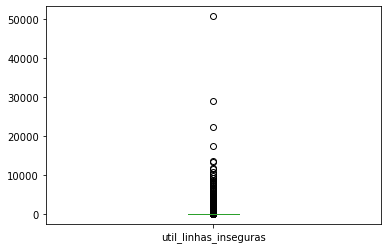

In [210]:
# Precisa retirar os outliers
treino.util_linhas_inseguras.plot(kind='box');

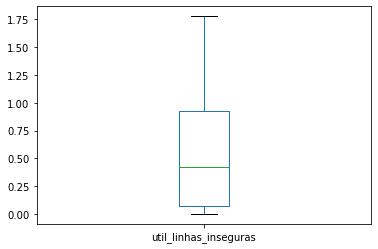

In [211]:
treino2.util_linhas_inseguras.plot(kind='box');

In [212]:
treino.head(3)

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [213]:
# Tratando os NaNs
treino.salario_mensal.isna().sum()

36292

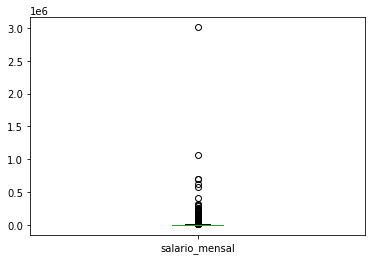

In [214]:
treino.salario_mensal.plot(kind='box');

In [215]:
treino2 = outliers(df=treino2,feature=5)

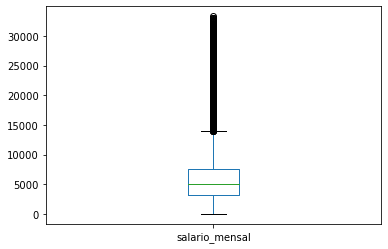

In [216]:
treino2.salario_mensal.plot(kind='box');

In [217]:
treino2.salario_mensal.fillna(treino2.salario_mensal.mean(),inplace=True)

In [218]:
treino2.dropna(inplace=True)

In [219]:
treino2.isna().any()

inadimplente                             False
util_linhas_inseguras                    False
idade                                    False
vezes_passou_de_30_59_dias               False
razao_debito                             False
salario_mensal                           False
numero_linhas_crdto_aberto               False
numero_vezes_passou_90_dias              False
numero_emprestimos_imobiliarios          False
numero_de_vezes_que_passou_60_89_dias    False
numero_de_dependentes                    False
dtype: bool

In [220]:
for i in range(5):
    treino2 = outliers(df=treino2,feature=4)

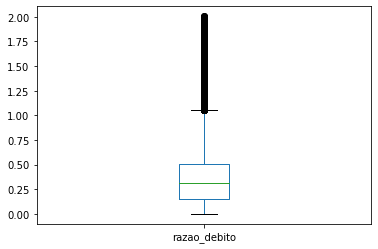

In [221]:
treino2.razao_debito.plot(kind='box');

In [224]:
y = treino2.iloc[:,0].copy()

X = treino2.iloc[:,1:].copy()

In [225]:
pca = PCA(n_components=6)

pca.fit(X)

X = pca.transform(X)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [227]:
param_grid = { 
    'n_estimators': [100, 120],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [3,4,5,6],
    'criterion' :['gini', 'entropy']}

In [228]:
rfc=RandomForestClassifier(random_state=42)

In [229]:
mod = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

mod.fit(X_train, y_train)

pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.107127,0.969264,0.264943,0.025125,gini,3,auto,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.629026,0.626601,0.630420,0.628682,0.001578,29
1,6.857012,0.781583,0.341781,0.043016,gini,3,auto,120,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.628006,0.626436,0.629787,0.628076,0.001369,31
2,5.164025,0.057129,0.240714,0.001049,gini,3,sqrt,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.629026,0.626601,0.630420,0.628682,0.001578,29
3,6.104970,0.038361,0.296806,0.010334,gini,3,sqrt,120,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.628006,0.626436,0.629787,0.628076,0.001369,31
4,6.629386,0.435481,0.269636,0.004784,gini,4,auto,100,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.640376,0.638172,0.641606,0.640051,0.001420,19
5,7.701773,0.121792,0.329897,0.006444,gini,4,auto,120,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.642029,0.637566,0.641495,0.640363,0.001990,17
6,7.253920,0.811897,0.300400,0.010355,gini,4,sqrt,100,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.640376,0.638172,0.641606,0.640051,0.001420,19
7,10.538433,2.056498,0.478719,0.127600,gini,4,sqrt,120,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.642029,0.637566,0.641495,0.640363,0.001990,17
8,9.356185,1.569659,0.372536,0.087242,gini,5,auto,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.656216,0.653076,0.657612,0.655635,0.001897,9
9,9.651036,0.419183,0.456942,0.112957,gini,5,auto,120,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.656161,0.651671,0.657695,0.655176,0.002556,11


In [230]:
y_pred = mod.predict(X_test)

In [231]:
accuracy_score(y_test, y_pred)

0.6790443539747161

In [232]:
recall_score(y_test, y_pred)

0.6698220205897749

In [233]:
precision_score(y_test, y_pred)

0.6745003294531079

In [234]:
f1_score(y_test, y_pred)

0.6721530346472894

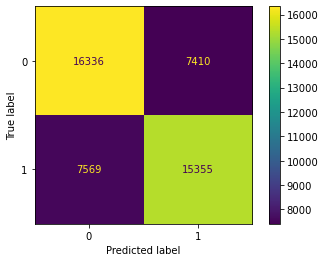

In [235]:
confusion_matrix(y_test, y_pred)

plot_confusion_matrix(mod, X_test, y_test)  

plt.show()  

### Conclusões:

**Apesar de todos os esforços em melhorar a qualidade dos dados,a 1a pipeline foi a melhor por conseguir melhor performance em detecção tanto de casos adimplentes como inadimplentes.**